In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

#### Load the dataset and split the data into features and target variables

In [14]:
X = pd.read_csv("diabetes.csv")
raw_features = X.iloc[:, 0:8] # [rows, columns]
target = X.iloc[:,-1:] # [rows, columns]

In [15]:
raw_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [16]:
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [5]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Normalize the data using StandardScaler of sklearn

In [18]:
features = StandardScaler().fit_transform(raw_features)
# This method normalize the data for us

In [19]:
features.shape

(768, 8)

Find Covariance

In [23]:
X = features.T # Transpose matrix X

#### Create the covariance matrix. 
You can use np.cov()

In [22]:
Cx = np.cov(X)
print('The Covariance Matrix is:\n', Cx)

The Covariance Matrix is:
 [[ 1.00130378  0.12962746  0.14146618 -0.08177826 -0.07363049  0.01770615
  -0.03356638  0.54505093]
 [ 0.12962746  1.00130378  0.15278853  0.05740263  0.33178913  0.2213593
   0.13751636  0.26385788]
 [ 0.14146618  0.15278853  1.00130378  0.2076409   0.08904933  0.2821727
   0.04131875  0.23984024]
 [-0.08177826  0.05740263  0.2076409   1.00130378  0.43735204  0.39308503
   0.18416737 -0.11411885]
 [-0.07363049  0.33178913  0.08904933  0.43735204  1.00130378  0.19811702
   0.18531222 -0.04221793]
 [ 0.01770615  0.2213593   0.2821727   0.39308503  0.19811702  1.00130378
   0.14083033  0.03628912]
 [-0.03356638  0.13751636  0.04131875  0.18416737  0.18531222  0.14083033
   1.00130378  0.03360507]
 [ 0.54505093  0.26385788  0.23984024 -0.11411885 -0.04221793  0.03628912
   0.03360507  1.00130378]]


#### Now that we have our covariance matrix, we will use linalg.eig from numpy to compute the eigenvectors and eigenvalues.

In [25]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx) #apply eigen decomposition

#### Order the eigenvalues and their corresponding eigenvectors in desceding order

In [26]:
ordered_id = np.argsort(eig_val_cov)[::-1]
ordered_vals = eig_val_cov[ordered_id]
ordered_vecs = eig_vec_cov[:, ordered_id]

#argsort -> sort index [7, 3, 8] -> [2, 0, 1]

#### Print the explained_variance_ratio created after the eigendecomposition

In [27]:
ordered_vals/sum(ordered_vals) #explained_variance_ratio_

array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305,
       0.08532855, 0.05247702, 0.05055776])

In [29]:
Q_2 = ordered_vecs[:, :2]

### Apply PCA to reduce the dimensionality of the data from  8 to 2.

#### We are now ready to use the PCA algorithm. We call the PCA algorithm and pass it to components (features).

In [30]:
pca = PCA(n_components=2)
PC = pca.fit_transform(features)
print(pca.explained_variance_ratio_)

[0.26179749 0.21640127]


In [32]:
PC

array([[ 1.06850273,  1.23489499],
       [-1.12168331, -0.73385167],
       [-0.39647671,  1.59587594],
       ...,
       [-0.28347525,  0.09706503],
       [-1.06032431,  0.83706234],
       [-0.83989172, -1.15175485]])

### We will now plot the Principal Components, with their outcomes. Make a scatter plot where you plot the persons without diabetes in green and persons with diabetes in red. 

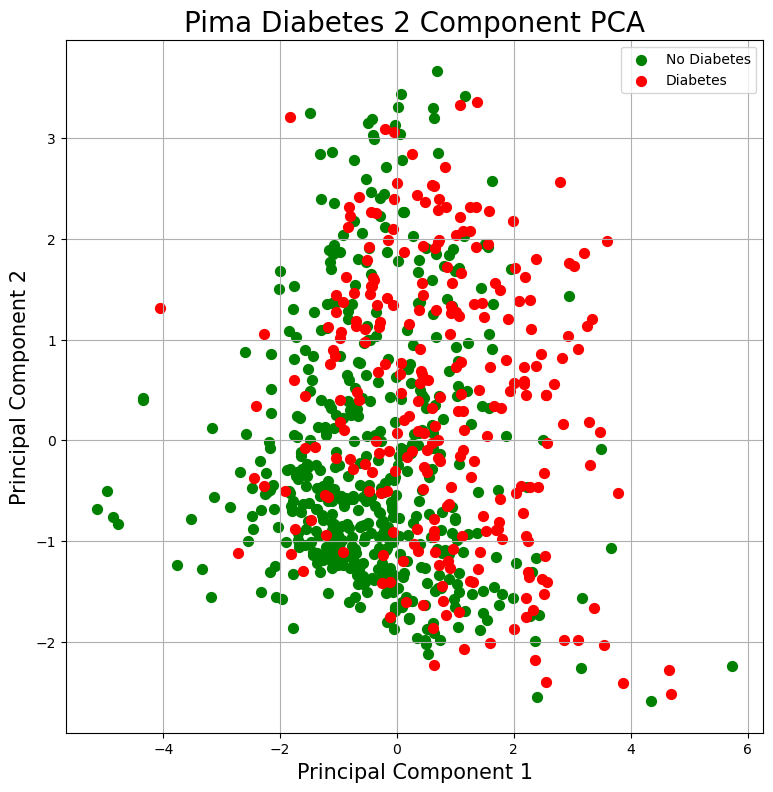

In [33]:
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Pima Diabetes 2 Component PCA', fontsize = 20)
labels = ["No Diabetes", "Diabetes"]
outcomes = [0, 1]
colors = ['g', 'r']
for outcome, color in zip(outcomes,colors):
    indicesToKeep = target['Outcome'] == outcome
    ax.scatter(PC[indicesToKeep, 0], PC[indicesToKeep, 1], c = color, s = 50)
ax.legend(labels)
ax.grid()

### Do you see any explanation for the selected components

In [36]:
df = pd.DataFrame(columns = raw_features.columns)
df.loc[0] = pca.components_[0,:]
df.loc[1] = pca.components_[1,:]

In [37]:
print(df)

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.128432  0.393083       0.360003       0.439824  0.435026  0.451941   
1     0.593786  0.174029       0.183892      -0.331965 -0.250781 -0.100960   

   DiabetesPedigreeFunction       Age  
0                  0.270611  0.198027  
1                 -0.122069  0.620589  


First principle components looks covers features that are related measurements that affect diabetes immediately like Glucose level and BMI.

Second principle component tends to discover cases of Gestional Diabetes that affects only young pregnant females